# Exploratory Data Analysis (EDA) of Virat Kohli's International Career

## Objective
The objective of this project is to perform Exploratory Data Analysis (EDA) on Virat Kohli's international cricket career data. 

We will analyze:
- Total runs scored
- Highest score
- Performance by match format (ODI, T20I, Test)
- Opponent-wise performance
- Year-wise performance
- Century analysis
- Visualization of trends


In [43]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization
plt.rcParams['figure.figsize'] = (10,6)

print("Libraries Imported Successfully")

Libraries Imported Successfully


## Loading the Dataset

In this step, we load the main dataset containing Virat Kohli's international match data.

In [44]:
# Load dataset
df = pd.read_csv("data/kohli_data.csv")

# Display first 5 rows
df.head()

,YEAR,ODI RUNS,INNINGS,AVERAGE,STRIKE RATE,HIGH SCORE,Unnamed: 6
0,2008,159,5,31.80,66.53,54,NaN
1,2009,325,8,54.17,84.42,107,NaN
2,2010,995,24,47.38,85.12,118,NaN
3,2011,1381,34,47.62,85.56,117,NaN
4,2012,1026,17,68.40,93.78,183,NaN


## Basic Information About Dataset

Before analysis, we must understand:
- Number of rows and columns
- Column names
- Data types
- Missing values


In [45]:
# Shape of dataset
df.shape

(15, 7)

In [46]:
# Column names
df.columns

Index(['YEAR', 'ODI RUNS', 'INNINGS', 'AVERAGE', 'STRIKE RATE', 'HIGH SCORE',
       'Unnamed: 6'],
      dtype='str')

In [47]:
# Dataset information
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         15 non-null     int64  
 1   ODI RUNS     15 non-null     int64  
 2   INNINGS      15 non-null     int64  
 3   AVERAGE      15 non-null     float64
 4   STRIKE RATE  15 non-null     float64
 5   HIGH SCORE   15 non-null     int64  
 6   Unnamed: 6   0 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 972.0 bytes


In [48]:
# Statistical summary
df.describe()

,YEAR,ODI RUNS,INNINGS,AVERAGE,STRIKE RATE,HIGH SCORE,Unnamed: 6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,0.0
mean,2015.000000,822.933333,16.866667,58.186667,89.635333,117.266667,NaN
std,4.472136,484.106610,9.612987,27.248374,10.404097,36.735477,NaN
min,2008.000000,129.000000,3.000000,21.870000,66.530000,54.000000,NaN
25%,2011.500000,378.000000,8.500000,45.190000,84.770000,98.000000,NaN
50%,2015.000000,995.000000,17.000000,52.830000,92.290000,118.000000,NaN
75%,2018.500000,1235.000000,24.500000,64.130000,98.330000,138.500000,NaN
max,2022.000000,1460.000000,34.000000,133.560000,102.560000,183.000000,NaN


## Data Cleaning

In this step we:
- Check for missing values
- Remove or handle incorrect data
- Convert data types if needed

In [49]:
# Check missing values
df.isnull().sum()

YEAR            0
ODI RUNS        0
INNINGS         0
AVERAGE         0
STRIKE RATE     0
HIGH SCORE      0
Unnamed: 6     15
dtype: int64

## Data Cleaning

We observed an unnecessary column named 'Unnamed: 6'.
We will remove it before analysis.


In [50]:
# Drop unnecessary column
df = df.drop(columns=['Unnamed: 6'])

df.head()

,YEAR,ODI RUNS,INNINGS,AVERAGE,STRIKE RATE,HIGH SCORE
0,2008,159,5,31.80,66.53,54
1,2009,325,8,54.17,84.42,107
2,2010,995,24,47.38,85.12,118
3,2011,1381,34,47.62,85.56,117
4,2012,1026,17,68.40,93.78,183


## Converting Data Types

We convert the YEAR column into integer format for proper analysis.


In [51]:
df['YEAR'] = df['YEAR'].astype(int)

df.dtypes

YEAR             int64
ODI RUNS         int64
INNINGS          int64
AVERAGE        float64
STRIKE RATE    float64
HIGH SCORE       int64
dtype: object

## Total ODI Runs

Now we calculate total runs scored by Virat Kohli in ODIs.


In [52]:
total_runs = df['ODI RUNS'].sum()

print("Total ODI Runs:", total_runs)


Total ODI Runs: 12344


## Highest Score in ODIs


In [53]:
highest_score = df['HIGH SCORE'].max()

print("Highest ODI Score:", highest_score)


Highest ODI Score: 183


## Best Year (Highest Runs)


In [54]:
best_year = df.loc[df['ODI RUNS'].idxmax()]

best_year


YEAR           2017.00
ODI RUNS       1460.00
INNINGS          26.00
AVERAGE          76.84
STRIKE RATE      99.12
HIGH SCORE      131.00
Name: 9, dtype: float64

## Year-wise ODI Runs Visualization


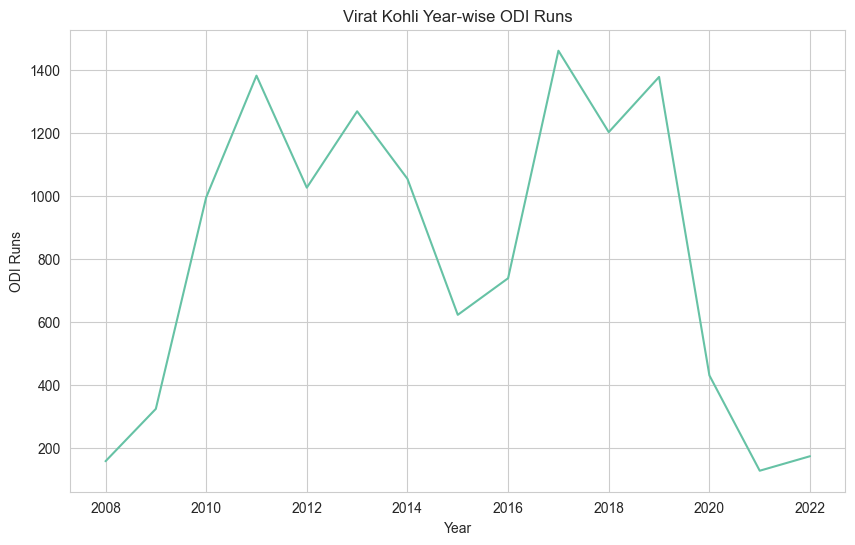

In [55]:
plt.plot(df['YEAR'], df['ODI RUNS'])
plt.xlabel("Year")
plt.ylabel("ODI Runs")
plt.title("Virat Kohli Year-wise ODI Runs")
plt.show()


## Batting Average Trend


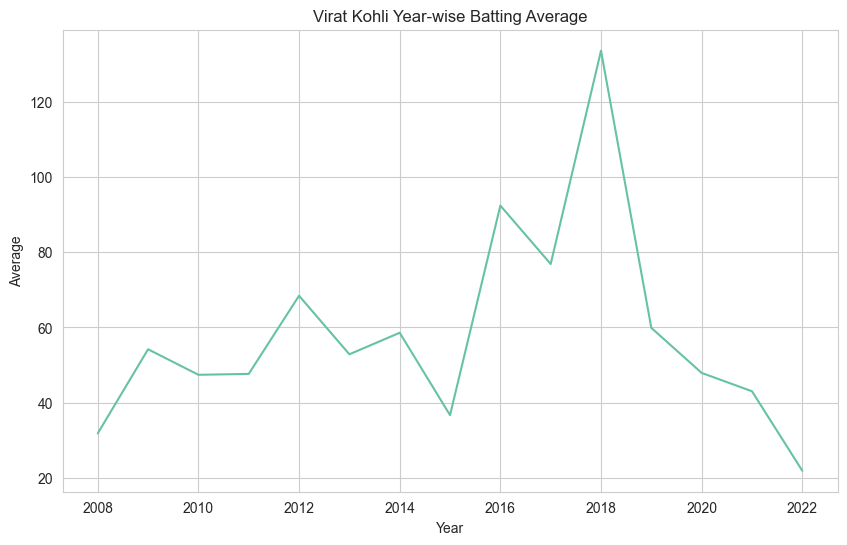

In [56]:
plt.plot(df['YEAR'], df['AVERAGE'])
plt.xlabel("Year")
plt.ylabel("Average")
plt.title("Virat Kohli Year-wise Batting Average")
plt.show()


# Full International Career Analysis of Virat Kohli

In this section, we analyze Virat Kohli's complete international career including:

- ODI
- T20I
- Test Matches

We will:
- Load all datasets
- Combine them
- Perform data cleaning
- Analyze total runs
- Compare formats
- Create visualizations


## Loading All Format Datasets


In [57]:
# Load ODI data
odi_df = pd.read_csv("data/virat_kohli_odi_innings_data.csv")

# Load T20I data
t20_df = pd.read_csv("data/virat_kohli_t20i_innings_data.csv")

# Load Test data
test_df = pd.read_csv("data/virat_kohli_test_innings_data.csv")

print("Datasets Loaded Successfully")

Datasets Loaded Successfully


## Adding Match Type Column

In [58]:
odi_df["FORMAT"] = "ODI"
t20_df["FORMAT"] = "T20I"
test_df["FORMAT"] = "TEST"

In [59]:
# check column names

print("ODI Columns:\n", odi_df.columns)
print("\nT20I Columns:\n", t20_df.columns)
print("\nTEST Columns:\n", test_df.columns)


ODI Columns:
 Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'Odi No', 'FORMAT'],
      dtype='str')

T20I Columns:
 Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'T20I No', 'FORMAT'],
      dtype='str')

TEST Columns:
 Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'Test No', 'FORMAT'],
      dtype='str')


## Removing Format-Specific Match Number Columns

Each dataset has a separate match number column:
- Odi No
- T20I No
- Test No

Since they are not required for our analysis, we will remove them before combining.


In [60]:
# Drop match number columns
odi_df = odi_df.drop(columns=['Odi No'])
t20_df = t20_df.drop(columns=['T20I No'])
test_df = test_df.drop(columns=['Test No'])

print("Unnecessary columns removed")

Unnecessary columns removed


## Combining All Formats Into One Dataset

In [61]:
# Combine datasets
full_df = pd.concat([odi_df, t20_df, test_df], ignore_index=True)

full_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,FORMAT
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-08-2008,ODI
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-08-2008,ODI
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-08-2008,ODI
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-08-2008,ODI
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-08-2008,ODI


## Combined Dataset Overview

In [62]:
full_df.shape

(556, 13)

In [63]:
full_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Runs        556 non-null    str  
 1   Mins        556 non-null    str  
 2   BF          556 non-null    str  
 3   4s          556 non-null    str  
 4   6s          556 non-null    str  
 5   SR          556 non-null    str  
 6   Pos         556 non-null    str  
 7   Dismissal   556 non-null    str  
 8   Inns        556 non-null    str  
 9   Opposition  556 non-null    str  
 10  Ground      556 non-null    str  
 11  Start Date  556 non-null    str  
 12  FORMAT      556 non-null    str  
dtypes: str(13)
memory usage: 56.6 KB


## Cleaning the Runs Column

The 'Runs' column may contain:
- Asterisks (*) for not-out innings
- Non-numeric values

We will clean and convert it into numeric format.

In [64]:
# Remove '*' from Runs column
full_df['Runs'] = full_df['Runs'].astype(str).str.replace('*', '')

# Convert to numeric
full_df['Runs'] = pd.to_numeric(full_df['Runs'], errors='coerce')

# Check missing values after conversion
full_df['Runs'].isnull().sum()

np.int64(24)

In [65]:
full_df = full_df.dropna(subset=['Runs'])

## Total International Runs

In [66]:
total_runs = full_df['Runs'].sum()

print("Total International Runs:", total_runs)

Total International Runs: 24376.0


## Format-wise Runs Comparison

In [67]:
format_runs = full_df.groupby('FORMAT')['Runs'].sum()

format_runs

FORMAT
ODI     12344.0
T20I     3958.0
TEST     8074.0
Name: Runs, dtype: float64

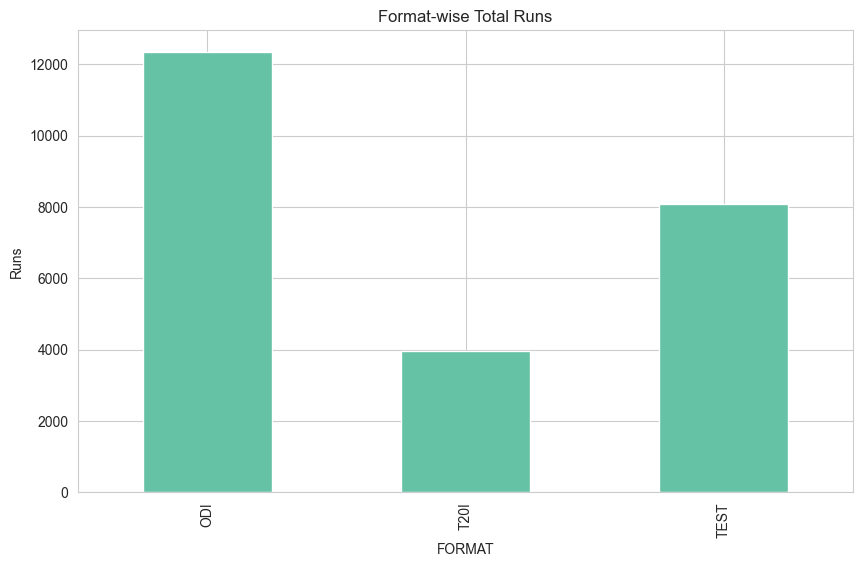

In [68]:
format_runs.plot(kind='bar')
plt.title("Format-wise Total Runs")
plt.ylabel("Runs")
plt.show()

## Highest Score in International Career

In [69]:
highest_score = full_df['Runs'].max()

print("Highest International Score:", highest_score)

Highest International Score: 254.0


## Extracting Year from Match Date

We extract the year from the 'Start Date' column 
to analyze performance trends over time.


In [70]:
# Convert Start Date to datetime
full_df['Start Date'] = pd.to_datetime(full_df['Start Date'])

# Extract year
full_df['YEAR'] = full_df['Start Date'].dt.year

full_df.head()

C:\Users\260016945\AppData\Local\Temp\ipykernel_30044\2617719827.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  full_df['Start Date'] = pd.to_datetime(full_df['Start Date'])


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,FORMAT,YEAR
0,12.0,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,ODI,2008
1,37.0,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,ODI,2008
2,25.0,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,ODI,2008
3,54.0,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,ODI,2008
4,31.0,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,ODI,2008


## Year-wise Total Runs

This visualization shows how Virat Kohli's performance 
has evolved across years in international cricket.


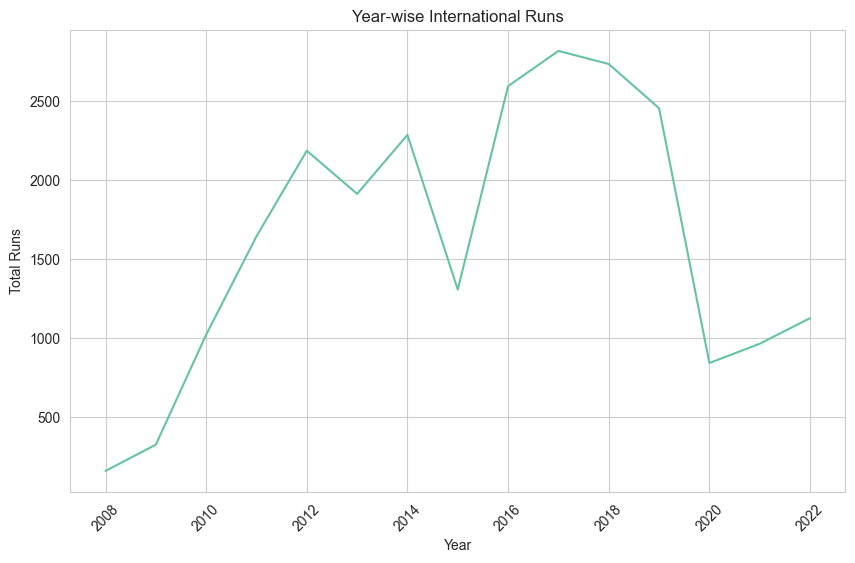

In [71]:
yearly_runs = full_df.groupby('YEAR')['Runs'].sum()

plt.figure()
sns.lineplot(x=yearly_runs.index, y=yearly_runs.values)
plt.title("Year-wise International Runs")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()

## Format-wise Batting Average

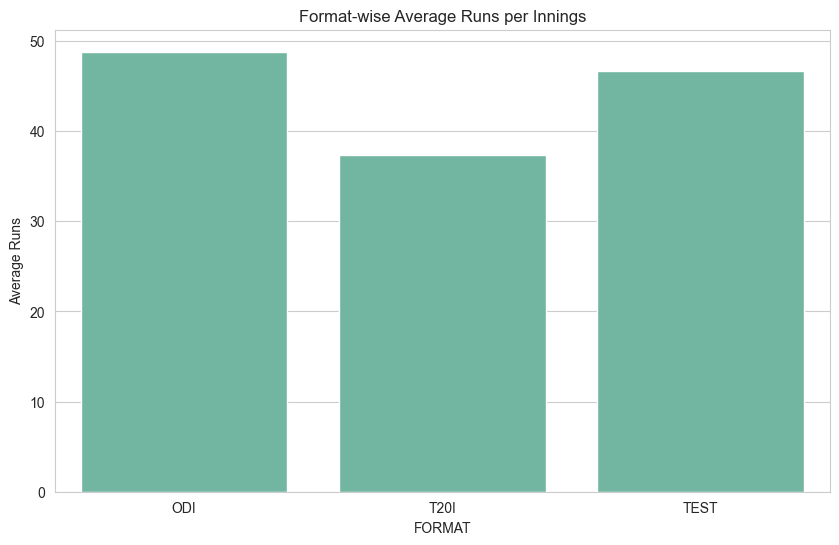

In [72]:
format_avg = full_df.groupby('FORMAT')['Runs'].mean()

plt.figure()
sns.barplot(x=format_avg.index, y=format_avg.values)
plt.title("Format-wise Average Runs per Innings")
plt.ylabel("Average Runs")
plt.show()


## Top 10 Opponents (Total Runs)

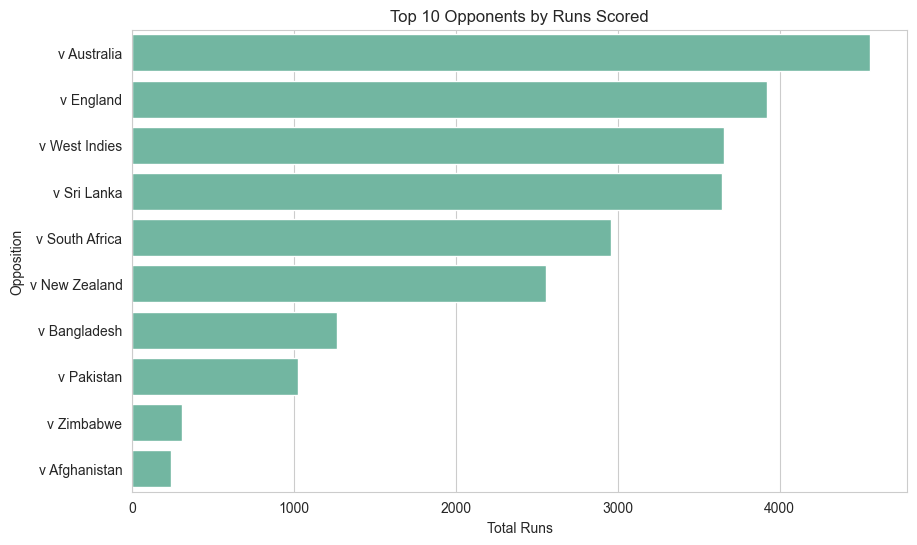

In [73]:
opponent_runs = full_df.groupby('Opposition')['Runs'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=opponent_runs.values, y=opponent_runs.index)
plt.title("Top 10 Opponents by Runs Scored")
plt.xlabel("Total Runs")
plt.show()

## 50s and 100s Analysis

In [74]:
fifties = full_df[(full_df['Runs'] >= 50) & (full_df['Runs'] < 100)].shape[0]
hundreds = full_df[full_df['Runs'] >= 100].shape[0]

print("Total 50s:", fifties)
print("Total 100s:", hundreds)

Total 50s: 128
Total 100s: 71


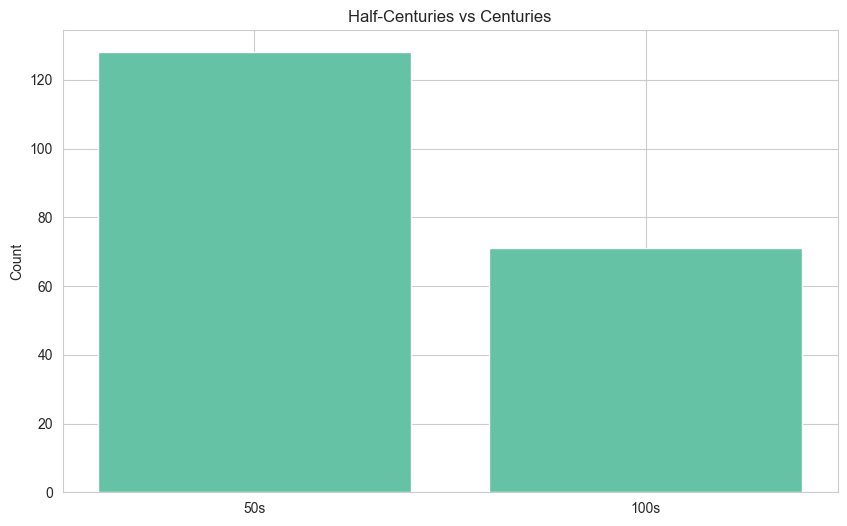

In [75]:
plt.figure()
plt.bar(['50s', '100s'], [fifties, hundreds])
plt.title("Half-Centuries vs Centuries")
plt.ylabel("Count")
plt.show()

## Top 10 Grounds by Runs

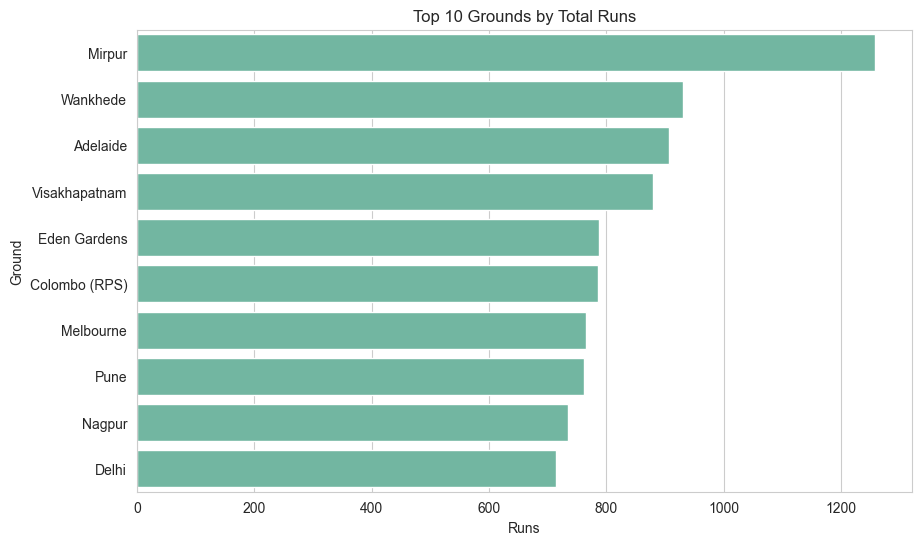

In [76]:
ground_runs = full_df.groupby('Ground')['Runs'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=ground_runs.values, y=ground_runs.index)
plt.title("Top 10 Grounds by Total Runs")
plt.xlabel("Runs")
plt.show()

## Career Progression (Cumulative Runs)

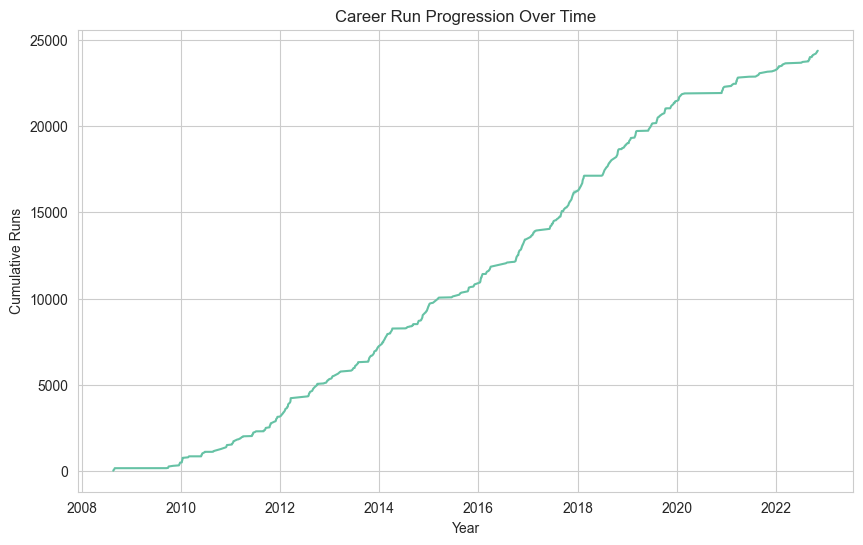

In [77]:
full_df = full_df.sort_values('Start Date')

full_df['Cumulative Runs'] = full_df['Runs'].cumsum()

plt.figure()
sns.lineplot(x=full_df['Start Date'], y=full_df['Cumulative Runs'])
plt.title("Career Run Progression Over Time")
plt.xlabel("Year")
plt.ylabel("Cumulative Runs")
plt.show()

Visualization using seaborn themes and color palettes.

In [78]:
# Set theme
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12,6)

## Distribution of Runs (Histogram)

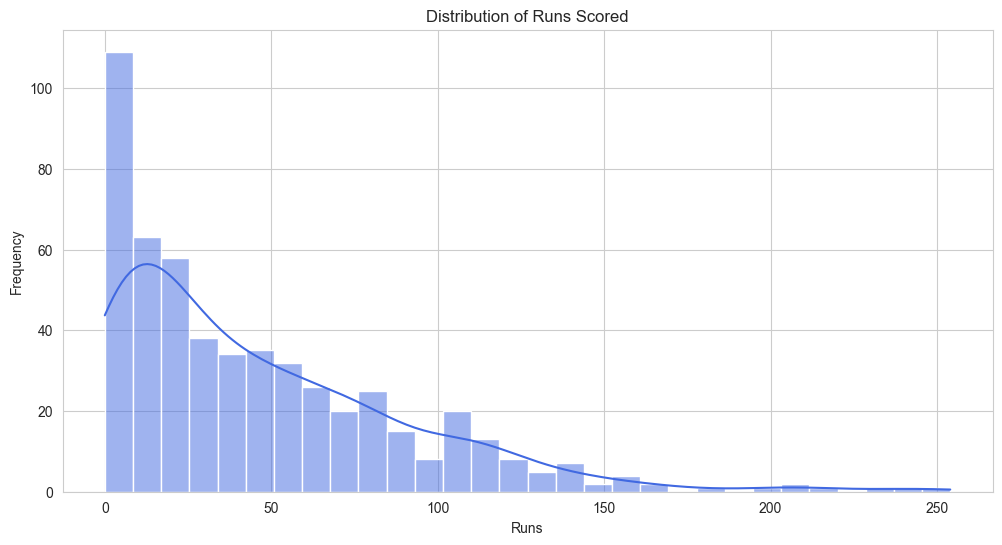

In [81]:
plt.figure()
sns.histplot(full_df['Runs'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Runs Scored")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

## Format-wise Run Distribution (Box Plot)

C:\Users\260016945\AppData\Local\Temp\ipykernel_30044\1032951800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FORMAT', y='Runs', data=full_df, palette="coolwarm")


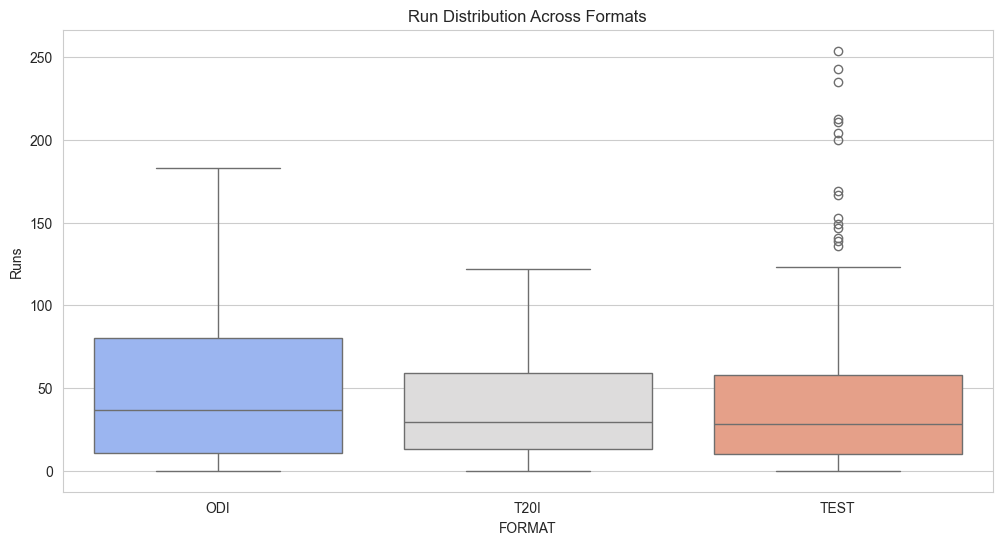

In [82]:
plt.figure()
sns.boxplot(x='FORMAT', y='Runs', data=full_df, palette="coolwarm")
plt.title("Run Distribution Across Formats")
plt.show()

## Format-wise Run Density (Violin Plot)

C:\Users\260016945\AppData\Local\Temp\ipykernel_30044\1146398943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FORMAT', y='Runs', data=full_df, palette="pastel")


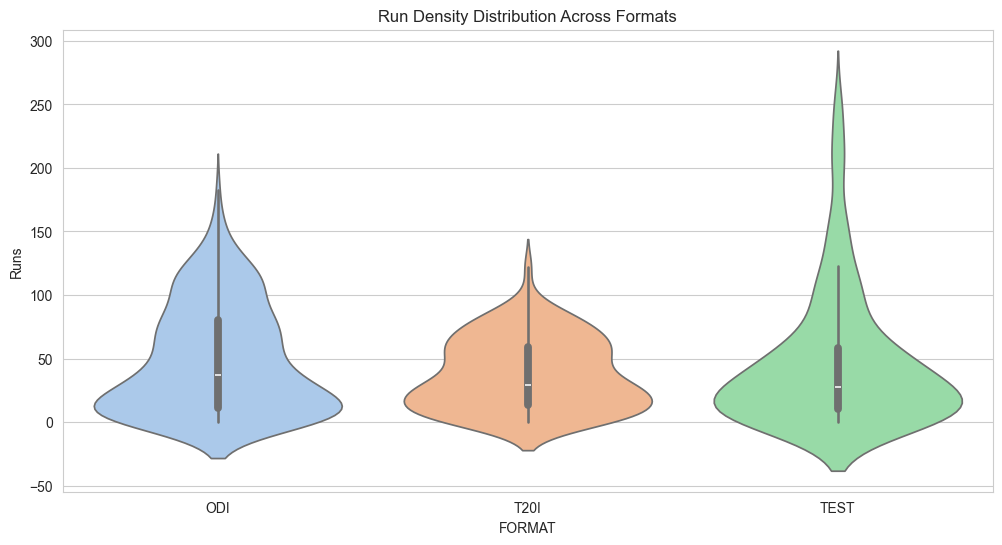

In [83]:
plt.figure()
sns.violinplot(x='FORMAT', y='Runs', data=full_df, palette="pastel")
plt.title("Run Density Distribution Across Formats")
plt.show()

## Heatmap: Format-wise Average Runs

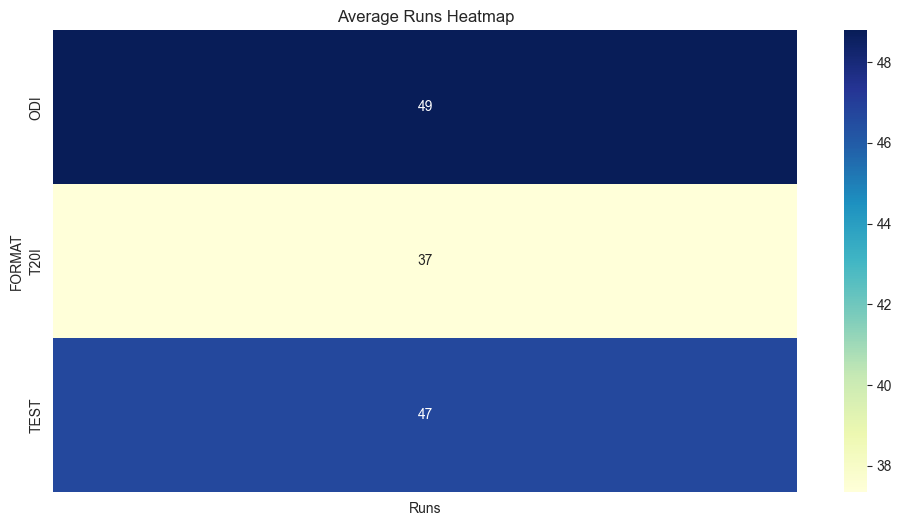

In [85]:
heat_data = full_df.groupby('FORMAT')['Runs'].mean().to_frame()

plt.figure()
sns.heatmap(heat_data, annot=True, cmap="YlGnBu")
plt.title("Average Runs Heatmap")
plt.show()

## Run Contribution by Format

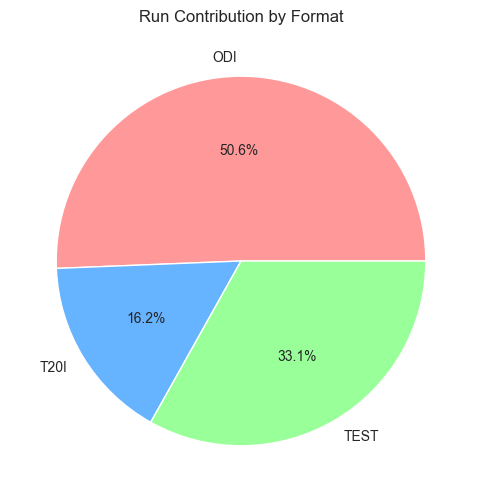

In [86]:
format_runs = full_df.groupby('FORMAT')['Runs'].sum()

plt.figure()
plt.pie(format_runs, labels=format_runs.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Run Contribution by Format")
plt.show()

## Strike Rate vs Runs

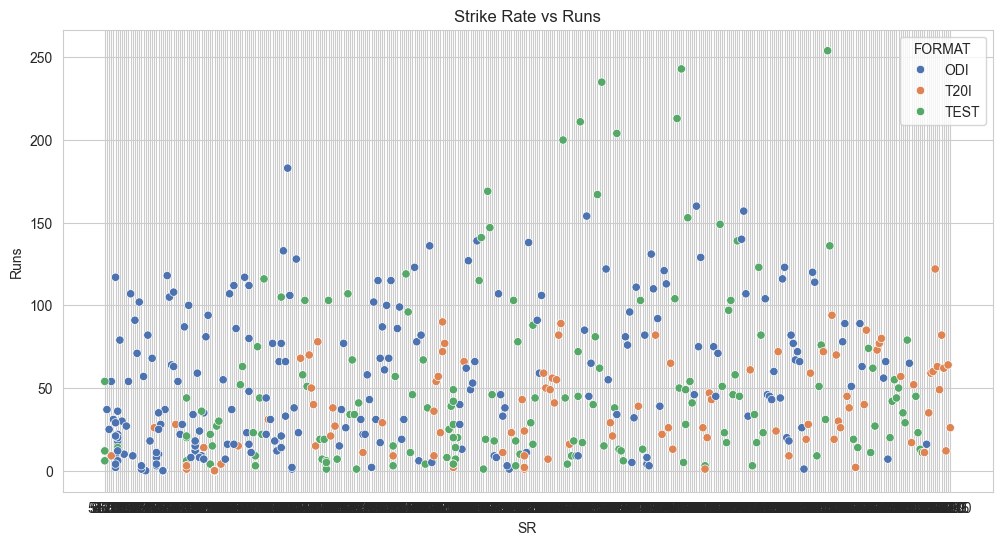

In [87]:
plt.figure()
sns.scatterplot(x='SR', y='Runs', hue='FORMAT', data=full_df, palette="deep")
plt.title("Strike Rate vs Runs")
plt.show()

## Year-wise Format Comparison

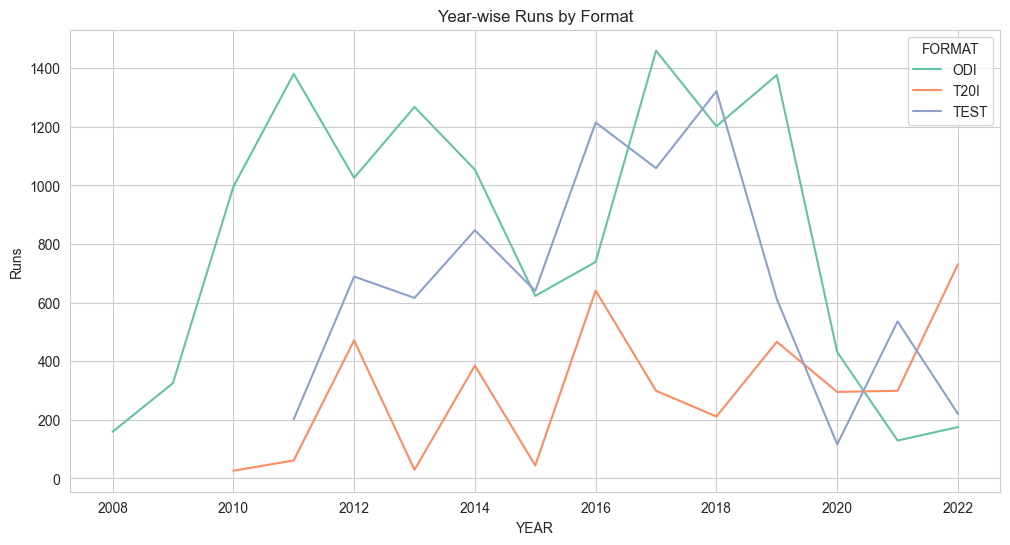

In [88]:
format_year = full_df.groupby(['YEAR','FORMAT'])['Runs'].sum().reset_index()

plt.figure()
sns.lineplot(data=format_year, x='YEAR', y='Runs', hue='FORMAT')
plt.title("Year-wise Runs by Format")
plt.show()

## Top 10 Highest Individual Scores

C:\Users\260016945\AppData\Local\Temp\ipykernel_30044\2521240548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runs', y='Opposition', data=top_scores, palette="viridis")


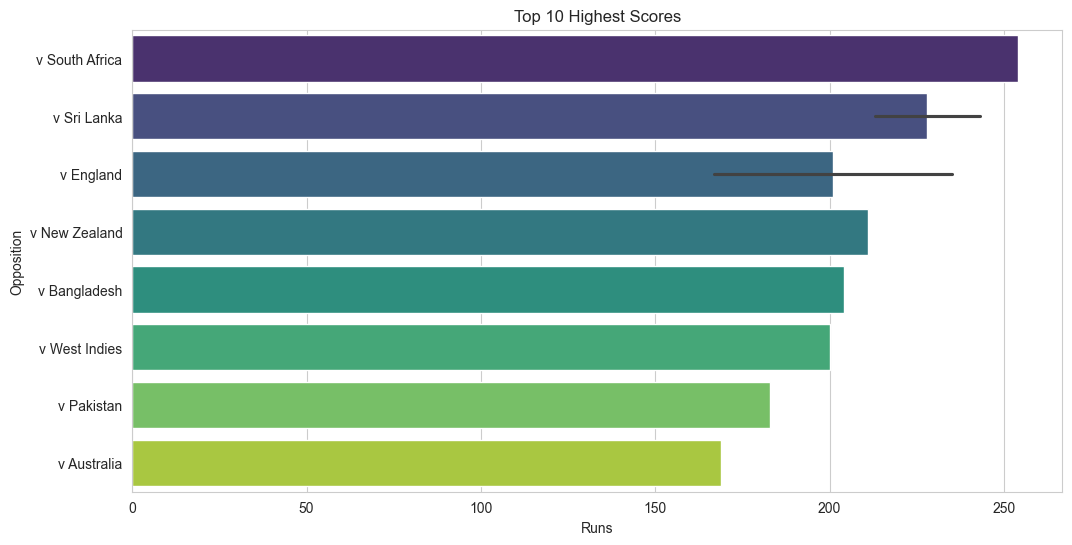

In [89]:
top_scores = full_df.sort_values('Runs', ascending=False).head(10)

plt.figure()
sns.barplot(x='Runs', y='Opposition', data=top_scores, palette="viridis")
plt.title("Top 10 Highest Scores")
plt.show()

## Dismissal Type Analysis

This section analyzes how Virat Kohli gets dismissed most frequently.

We examine:
- Caught
- Bowled
- LBW
- Run Out
- Not Out %

This helps understand weaknesses and batting stability.


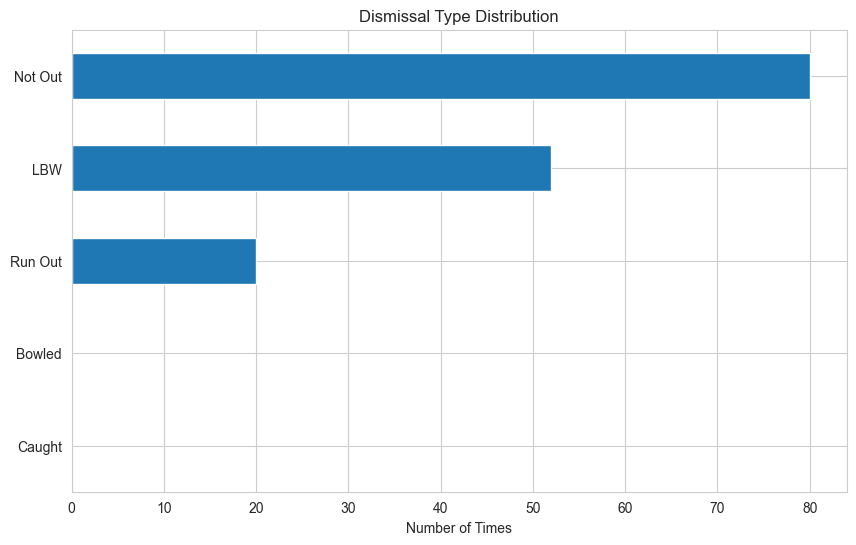

Not Out Percentage: 15.04%


In [92]:
import matplotlib.pyplot as plt

# Clean dismissal column (remove extra text like "c Smith b Starc")
dismissal_clean = full_df['Dismissal'].str.lower()

# Categorize dismissal types
dismissal_summary = {
    'Caught': dismissal_clean.str.contains('c ').sum(),
    'Bowled': dismissal_clean.str.contains('b ').sum(),
    'LBW': dismissal_clean.str.contains('lbw').sum(),
    'Run Out': dismissal_clean.str.contains('run out').sum(),
    'Not Out': dismissal_clean.str.contains('not out').sum()
}

dismissal_series = pd.Series(dismissal_summary)

plt.figure(figsize=(10,6))
dismissal_series.sort_values().plot(kind='barh', color='#1f77b4')
plt.title("Dismissal Type Distribution")
plt.xlabel("Number of Times")
plt.show()

# Not Out Percentage
not_out_percentage = (dismissal_summary['Not Out'] / len(full_df)) * 100
print(f"Not Out Percentage: {not_out_percentage:.2f}%")

## Consistency Analysis

Standard Deviation (STD) measures variation in scores.

Lower STD → More consistent  
Higher STD → More fluctuation in scores

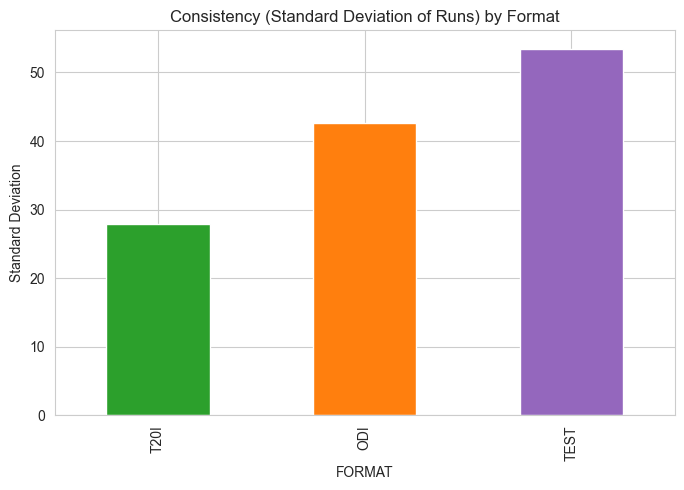

Consistency (Lower is Better):
FORMAT
T20I    27.941738
ODI     42.622368
TEST    53.477023
Name: Runs, dtype: float64


In [93]:
consistency = full_df.groupby('FORMAT')['Runs'].std().sort_values()

plt.figure(figsize=(8,5))
consistency.plot(kind='bar', color=['#2ca02c','#ff7f0e','#9467bd'])
plt.title("Consistency (Standard Deviation of Runs) by Format")
plt.ylabel("Standard Deviation")
plt.show()

print("Consistency (Lower is Better):")
print(consistency)

## Strike Rate Trend Over Years

This section analyzes how Virat Kohli’s strike rate has evolved over time.

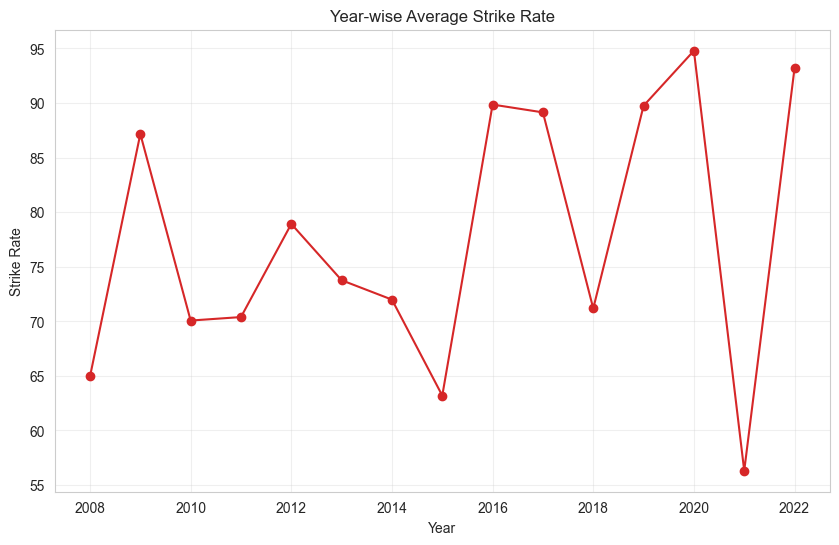

In [95]:
# Convert Strike Rate column to numeric
full_df['SR'] = pd.to_numeric(full_df['SR'], errors='coerce')

# Extract year
full_df['YEAR'] = pd.to_datetime(full_df['Start Date'], errors='coerce').dt.year

# Remove rows where SR or YEAR is NaN
sr_df = full_df.dropna(subset=['SR', 'YEAR'])

# Calculate yearly average strike rate
yearly_sr = sr_df.groupby('YEAR')['SR'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(yearly_sr['YEAR'], yearly_sr['SR'], marker='o', color='#d62728')
plt.title("Year-wise Average Strike Rate")
plt.xlabel("Year")
plt.ylabel("Strike Rate")
plt.grid(alpha=0.3)
plt.show()


## Performance Before vs After Captaincy

This section compares performance:

- Before 2017 (Pre-Captaincy)
- 2017 onwards (Captaincy Phase)

We analyze:
- Total Runs
- Batting Average

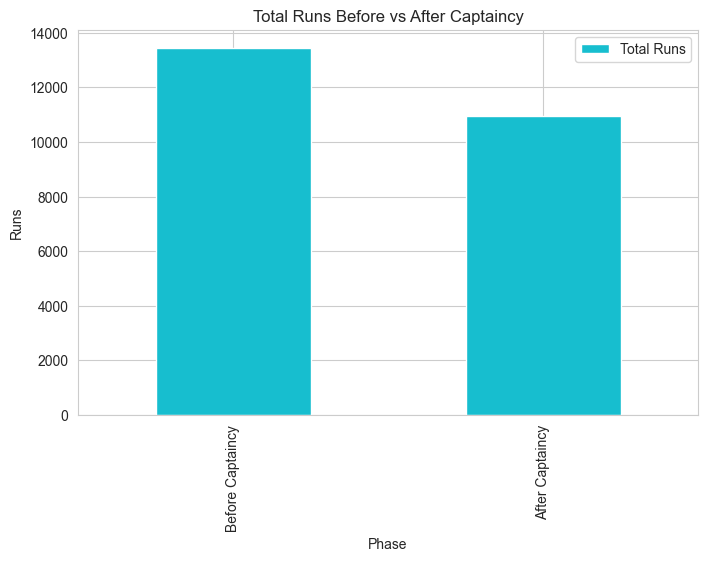

Average Before Captaincy: 44.94
Average After Captaincy: 46.95


In [96]:
# Split dataset
before_captaincy = full_df[full_df['YEAR'] < 2017]
after_captaincy = full_df[full_df['YEAR'] >= 2017]

# Total runs
runs_before = before_captaincy['Runs'].sum()
runs_after = after_captaincy['Runs'].sum()

# Average
avg_before = before_captaincy['Runs'].mean()
avg_after = after_captaincy['Runs'].mean()

# Plot comparison
comparison_df = pd.DataFrame({
    'Phase': ['Before Captaincy', 'After Captaincy'],
    'Total Runs': [runs_before, runs_after],
    'Average Runs': [avg_before, avg_after]
})

comparison_df.set_index('Phase')[['Total Runs']].plot(
    kind='bar',
    figsize=(8,5),
    color=['#17becf','#bcbd22']
)

plt.title("Total Runs Before vs After Captaincy")
plt.ylabel("Runs")
plt.show()

print("Average Before Captaincy:", round(avg_before,2))
print("Average After Captaincy:", round(avg_after,2))